In [37]:
import pickle
import pandas as pd
import torch
import io

from run_resnet import LayerwiseQuantizationProblem, QuantizationModel, CalibrationModel

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)


with open('exploration.pkl', 'rb') as f:
    d = CPU_Unpickler(f).load()

type(d)

pymoo.core.result.Result

In [38]:
from torchvision import models

m = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
layer_names = []

for name, module in m.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        layer_names.append(name)


In [39]:
d.opt[0].get("F")

array([ -0.7586, 440.    ])

In [53]:
import numpy as np

pop = d.pop

df_data = np.empty( (0, 55) )
for ind in d.opt:
    l = np.concatenate( (ind.get("F"), ind.get("X")) )
    l = np.expand_dims(l, axis=0)
    df_data = np.concatenate( (df_data, l), axis=0)

print(df_data.shape)
df = pd.DataFrame(df_data, columns=["Acc", "Bits"] + layer_names)

df['Acc'] = -df['Acc']
df.sort_values('Bits')

(26, 55)


,Acc,Bits,conv1,layer1.0.conv1,layer1.0.conv2,layer1.0.conv3,layer1.0.downsample.0,layer1.1.conv1,layer1.1.conv2,layer1.1.conv3,...,layer4.0.conv1,layer4.0.conv2,layer4.0.conv3,layer4.0.downsample.0,layer4.1.conv1,layer4.1.conv2,layer4.1.conv3,layer4.2.conv1,layer4.2.conv2,layer4.2.conv3
25,0.6084,400.0,9.0,9.0,4.0,4.0,7.0,5.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,5.0,7.0,7.0,3.0,7.0
9,0.6116,405.0,9.0,9.0,4.0,4.0,7.0,5.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,5.0,7.0,7.0,3.0,7.0
13,0.6266,407.0,9.0,9.0,4.0,4.0,7.0,5.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,3.0,7.0
2,0.6270,408.0,9.0,9.0,4.0,4.0,7.0,5.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,3.0,7.0
21,0.6472,409.0,9.0,9.0,4.0,4.0,7.0,6.0,9.0,6.0,...,12.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,3.0,7.0
16,0.6598,410.0,9.0,9.0,4.0,4.0,7.0,6.0,9.0,7.0,...,8.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,4.0,7.0
20,0.6838,411.0,9.0,9.0,4.0,5.0,7.0,6.0,9.0,7.0,...,8.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,4.0,7.0
24,0.7372,423.0,9.0,9.0,8.0,7.0,7.0,6.0,9.0,7.0,...,12.0,4.0,7.0,9.0,6.0,5.0,7.0,7.0,4.0,7.0
23,0.7516,428.0,10.0,10.0,7.0,5.0,7.0,6.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,6.0,9.0,7.0,10.0,7.0
8,0.7536,431.0,10.0,10.0,7.0,5.0,7.0,6.0,9.0,6.0,...,7.0,4.0,7.0,9.0,6.0,6.0,7.0,7.0,11.0,7.0


<AxesSubplot:xlabel='Acc', ylabel='Bits'>

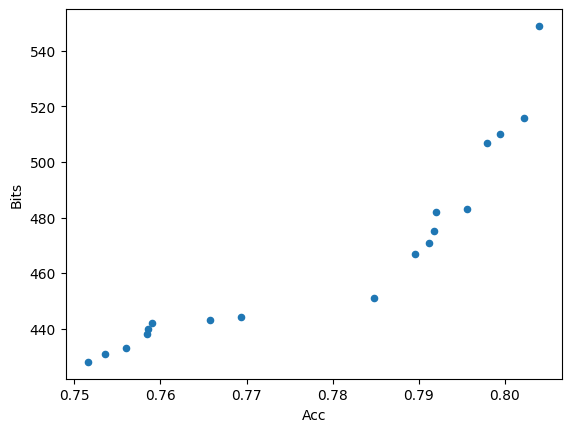

In [56]:
df_sel = df.where(df['Acc'] > 0.75)
df_sel.plot(x='Acc', y='Bits', kind='scatter')

<AxesSubplot:>

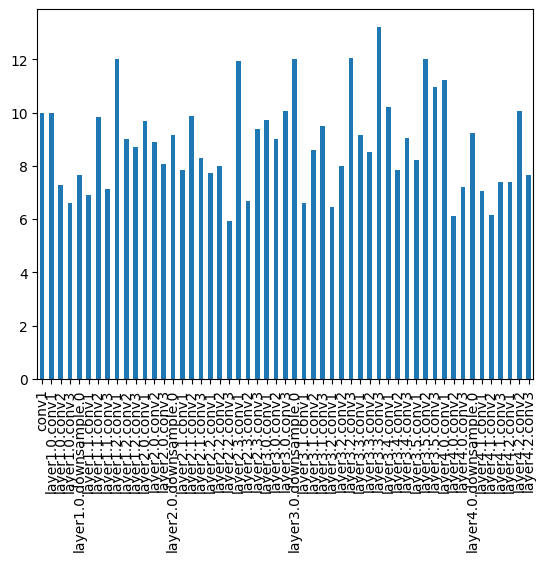

In [60]:
df_sel.mean().iloc[2:].plot(kind='bar')